# TRANSFORMACION DE LA VARIABLE INDEPENDIENTE<a class="tocSkip">
## SISTEMAS Y SEÑALES <a class="tocSkip">
### Ingenieria de Telecomunicaciones <a class="tocSkip">
### Universidad Pontificia Bolivariana <a class="tocSkip">   
### Por: Jose R. Zapata - [https://joserzapata.github.io/](https://joserzapata.github.io/) <a class="tocSkip">
**joser.zapata@upb.edu.co**

<h1>Contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Corrimiento-del-tiempo-(-Temporal-Shift)" data-toc-modified-id="Corrimiento-del-tiempo-(-Temporal-Shift)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Corrimiento del tiempo ( Temporal Shift)</a></span></li><li><span><a href="#Inversion-en-el-Tiempo-(Temporal-Flipping)" data-toc-modified-id="Inversion-en-el-Tiempo-(Temporal-Flipping)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inversion en el Tiempo (Temporal Flipping)</a></span></li><li><span><a href="#Escalamiento-en-el-tiempo-(Temporal-Scaling)" data-toc-modified-id="Escalamiento-en-el-tiempo-(Temporal-Scaling)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Escalamiento en el tiempo (Temporal Scaling)</a></span></li><li><span><a href="#Transformacion-General" data-toc-modified-id="Transformacion-General-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transformacion General</a></span></li><li><span><a href="#Cambio-de-Amplitud-de-la-señal" data-toc-modified-id="Cambio-de-Amplitud-de-la-señal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cambio de Amplitud de la señal</a></span></li><li><span><a href="#REFERENCIAS" data-toc-modified-id="REFERENCIAS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>REFERENCIAS</a></span></li></ul></div>

In [1]:
# Script para ver y ocultar el codigo del jupyter 
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Ver el Codigo de Python')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Ocultar el Codigo')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()">
<input type="submit" id="toggleButton" value="Ver el Codigo de Python"></form>''')

Modificacion basicas de la variable independiente, generalemente el tiempo. Permiten introducir varias propiedades basicas de los sistemas y señales

In [2]:
# importar librerias de python

import sympy as sym # Libreria de operaciones matematicass simbolicas
import matplotlib.pyplot as plt
plt.style.use('bmh') # estilo de las graficas
%matplotlib inline

from IPython.display import Latex # para visualizar ecuaciones en jupyter

#sym.init_printing()

Definicion de la funcion a graficar que se usara como ejemplo

x(t) = 


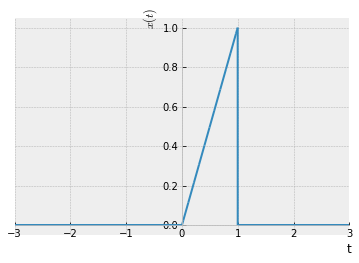

In [3]:
#definicion de t como variable simbolica
t = sym.symbols('t', real=True) 

# Funcion en forma de triangulo
trian = t*sym.Heaviside(t) - t*sym.Heaviside(t - 1)

# Grafica de la funcion creada
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');

# Corrimiento del tiempo ( Temporal Shift)

Una señal $x(t)$ o $x[n]$ que se retrasa por $\tau$ segundos se representa como una versión desplazada hacia la derecha el eje t.

Una señal desplazada en el tiempo $x(t)$ es definida como

\begin{equation}
y(t) = x(t-\tau)
\end{equation}
con $\tau \in \mathbb{R}$. La señal $x(t)$ es

- Desplazada a La derecha (retrazada) para $\tau>0$ 
    - Señal continua $x(t−\tau)$
    - Señal discreta $x[n − \tau]$
    
Ejemplo: Sonares, señales de sismos, radares, señales de varios sensores en diferentes posiciones    

x(t) = 


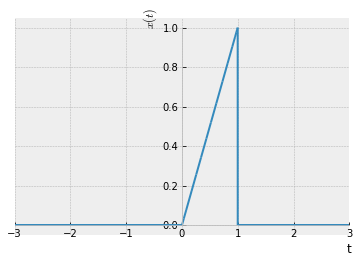

x(t-1) = 


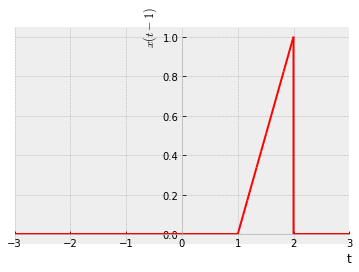

In [4]:
# Correr la funcion 1 segundo
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');

print('x(t-1) = ')
x = trian.subs(t, t-1)
sym.plot(x,(t, -3, 3),  ylabel=r'$x(t-1)$', line_color='red');

- Desplazada a La izquierda (adelantada) si  $\tau < 0$
    - Señal continua $x(t + \tau)$
    - Señal discreta $x[n + \tau]$ 

x(t) = 


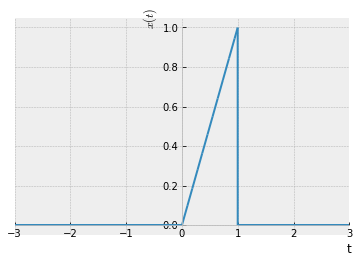

x(t+1) = 


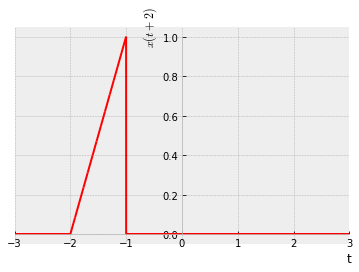

In [5]:
# Correr la funcion 1 segundo
x = trian.subs(t, t+2)
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');
print('x(t+1) = ')
sym.plot(x,(t, -3, 3),  ylabel=r'$x(t+2)$', line_color='red');

# Inversion en el Tiempo (Temporal Flipping)
La inversion en el tiempo de una señal $x(t)$ esta definida como
\begin{equation}
y(t) = x(- t)
\end{equation}
Se interpreta geometricamente como el reflejo de la señal respecto al eje vertical

x(t) = 


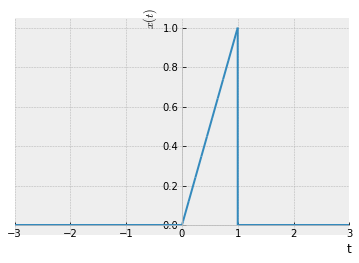

x(-t) = 


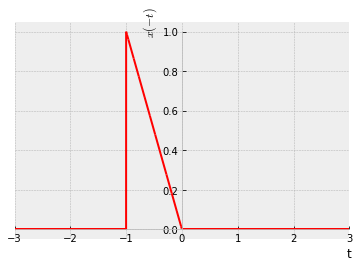

In [6]:
# invertir la funcion en el tiempo

#Grafica Original
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');

# Inversion
x = trian.subs(t, -t)
# Grafica de la funcion modificada
print('x(-t) = ')
sym.plot(x,(t, -3, 3),  ylabel=r'$x(-t)$', line_color='red');

# Escalamiento en el tiempo (Temporal Scaling)
La compresión o expansión de la señal en el tiempo es conocida como escalamiento en el tiempo.

El escalamiento temporal de la señal $x(t)$ se define como

\begin{equation}
y(t) = x(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $x(t)$ es

* Estirada o expandida para $0 < a < 1$
* Comprimida para $a > 1$
* Invertida en el tiempo y escalda para $a < 0$

Una aplicacaion del escalamiento temporal en procesamiento de señales en la adaptacion de la escala de tiempo para el modelamiento del efecto [Doppler](https://es.wikipedia.org/wiki/Efecto_Doppler).

x(t) = 


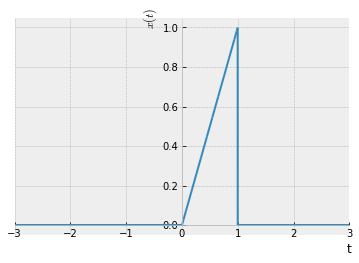

<IPython.core.display.Latex object>

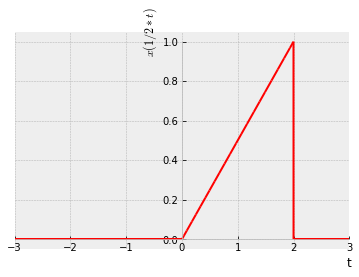

In [7]:
# Escalamiento temporal por un numero menor que 1

#Grafica Original
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');

# Escalamiento por 0.5
a = .5
x = trian.subs(t, a*t)
display(Latex(r'$\large x \left (\frac{1}{2} t \right)$'))
# Grafica de la funcion modificada
sym.plot(x,(t, -3, 3),  ylabel=r'$x(1/2*t)$', line_color='red');

x(t) = 


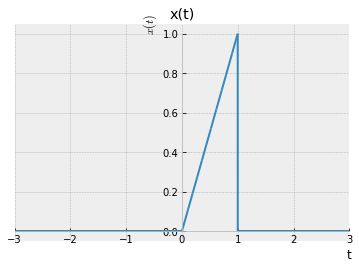

<IPython.core.display.Latex object>

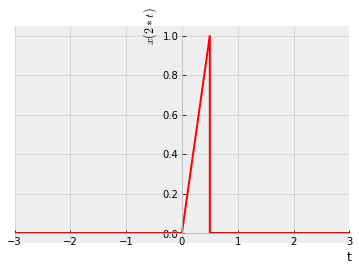

In [8]:
# Escalamiento temporal por un numero mayor que 1

#Grafica Original
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$', title = 'x(t)');

# Escalamiento por 0.5
a = 2
x = trian.subs(t, a*t)
# Grafica de la funcion modificada

display(Latex(r'$\large x \left ( 2 t \right)$'))

sym.plot(x,(t, -3, 3),  ylabel=r'$x(2*t)$', line_color='red');

# Transformacion General

El efecto de transformar la variable independiente de una señal $x(t)$ para obtener la señal modificada es de la forma:

\begin{equation}
y(t) = x(a \cdot t +b)
\end{equation}

Con la transformación, la variable independiente conserva la forma de x(t). La señal puede ser:

- Alargada linealmente cuando $|a| < 1$ ,
- Comprimida si $|a| > 1$,
- Invertida en el tiempo si $a < 0$, y
- Desplazada en el tiempo si $b$ es diferente de cero.
    - siendo desplazada a la derecha si se resta el valor de $|b|$
    - siendo desplazada a la izquierda si se suma el valor de $|b|$
    
**Nota:  Primero se hace el desplazamiento y luego se escala**    

x(t) = 


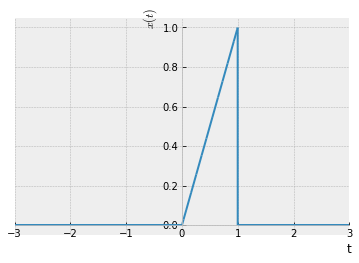

<IPython.core.display.Latex object>

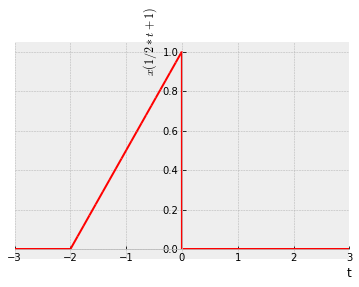

In [9]:
# Transformaciones Generales

#Grafica Original
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');

# Escalamiento por 0.5
a = .5
# Desplazamiento de -1
x = trian.subs(t, a*t+1)
# Grafica de la funcion modificada
display(Latex(r'$\large x \left (\frac{1}{2} t +1\right)$'))
sym.plot(x,(t, -3, 3),  ylabel=r'$x(1/2*t+1)$', line_color='red');

Otro Ejemplo = 
x(t) = 


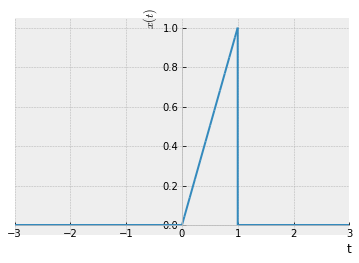

<IPython.core.display.Latex object>

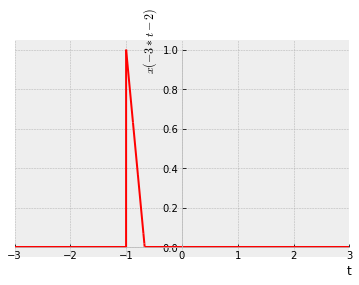

In [10]:
# Transformaciones Generales

#Grafica Original
print('Otro Ejemplo = ')
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$');

# Escalamiento por -3
a = -3
# Desplazamiento de 2
x = trian.subs(t, a*t-2)
# Grafica de la funcion modificada
display(Latex(r'$\large x \left ( -3 t -2 \right)$'))
sym.plot(x,(t, -3, 3),  ylabel=r'$x(-3*t-2)$', line_color='red');

# Cambio de Amplitud de la señal

Estos cambios no se realizan en la variable independiente, si no que afectan la amplitud de la señal

x(t) = 


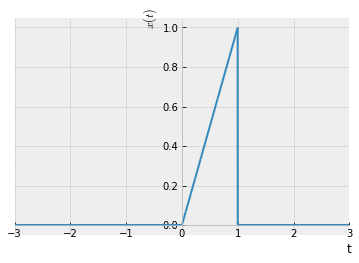

2 x(t) = 


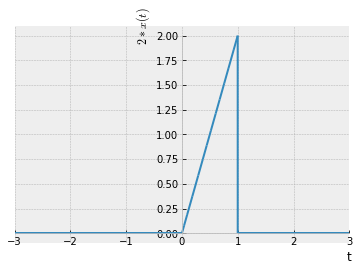

In [11]:
#Grafica Original
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$')

# Multiplicar por dos la amplitud
print('2 x(t) = ')
sym.plot(2*trian,(t, -3, 3),  ylabel=r'$2*x(t)$');

x(t) = 


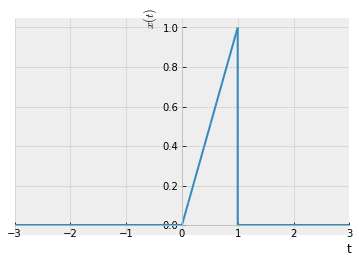

-2 x(t) = 


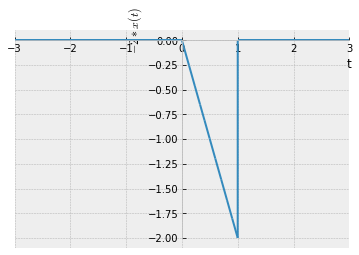

In [12]:
#Grafica Original
print('x(t) = ')
sym.plot(trian,(t, -3, 3),  ylabel=r'$x(t)$')

# Multiplicar por dos la amplitud
print('-2 x(t) = ')
sym.plot(-2*trian,(t, -3, 3),  ylabel=r'$-2*x(t)$');

# REFERENCIAS
- https://github.com/spatialaudio/signals-and-systems-lecture
- http://blog.espol.edu.ec/telg1001/senales-operaciones-en-tiempo/

**Phd. Jose R. Zapata**
- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- https://twitter.com/joserzapata
